Logistic Regression
=========

In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("ggplot")

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_fscore_support, auc, accuracy_score

In [2]:
data = pd.read_csv("../data/loans_sample_processed.csv", sep = "^").sample(100000, random_state = 4290)

In [3]:
data.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
337231,15000.0,555.32,19.72,55000.00,15.77,0.0,47.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
556157,15400.0,515.12,12.49,110000.00,10.19,0.0,26.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
580514,15000.0,501.74,12.49,44275.82,13.93,0.0,17.0,0,1,1,...,0,0,0,0,0,0,1,1,0,1
446532,12000.0,377.09,8.19,69000.00,19.63,0.0,19.0,0,1,1,...,0,0,0,0,0,0,1,1,0,0
95642,2300.0,78.60,13.99,30000.00,18.68,0.0,11.0,1,1,1,...,0,0,0,0,0,0,1,1,0,0


In [4]:
data.shape

(100000, 38)

__Scale__:

In [5]:
numeric_variables = ['funded_amnt_inv', 'installment', 'int_rate', 'annual_inc', 'dti',
                     'total_rec_late_fee', 'total_acc']

In [6]:
scaler = RobustScaler()

In [7]:
scaler.fit(data[numeric_variables])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [8]:
data[numeric_variables] = scaler.transform(data[numeric_variables])

In [9]:
data.head()

,funded_amnt_inv,installment,int_rate,annual_inc,dti,total_rec_late_fee,total_acc,manager,refinance,term_ 36 months,...,emp_length_< 1 year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Individual,application_type_Joint App,non_payment
337231,0.248963,0.552989,1.068254,-0.222222,-0.134822,0.0,1.533333,0,1,1,...,0,0,0,0,0,0,1,1,0,0
556157,0.282158,0.428492,-0.079365,1.000000,-0.596361,0.0,0.133333,0,1,1,...,0,0,0,0,0,0,1,1,0,0
580514,0.248963,0.387055,-0.079365,-0.460537,-0.287014,0.0,-0.466667,0,1,1,...,0,0,0,0,0,0,1,1,0,1
446532,0.000000,0.001022,-0.761905,0.088889,0.184450,0.0,-0.333333,0,1,1,...,0,0,0,0,0,0,1,1,0,0
95642,-0.804979,-0.923382,0.158730,-0.777778,0.105873,0.0,-0.866667,1,1,1,...,0,0,0,0,0,0,1,1,0,0


In [10]:
#data = pd.concat([data[data['non_payment']==0].sample(20000), data[data['non_payment']==1].sample(20000)], axis = 0).sort_index()

__Train / Test split:__

In [11]:
X = data.loc[:, data.columns!='non_payment']

In [12]:
y = data['non_payment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4290)

__Prior__:

In [14]:
y.value_counts()[0] / len(y)

0.79388

__Logistic Regression__:

In [15]:
log_reg = LogisticRegression(penalty='l2',C=1)

In [16]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
log_reg.predict_proba(X_test)

array([[0.77470423, 0.22529577],
       [0.6131935 , 0.3868065 ],
       [0.80700113, 0.19299887],
       ...,
       [0.72133295, 0.27866705],
       [0.92655666, 0.07344334],
       [0.87793569, 0.12206431]])

__Model Evaluation__

AUC in the train set:

In [18]:
y_scores_train = log_reg.predict_proba(X_train)

y_scores_train = pd.DataFrame(y_scores_train).loc[:,1]

In [19]:
roc_auc_score(y_train, y_scores_train)

0.7182442755263239

ROC Curve:

In [20]:
y_scores = log_reg.predict_proba(X_test)

y_scores = pd.DataFrame(y_scores).loc[:,1]

In [21]:
fpr, tpr, _ = roc_curve(y_test, y_scores)

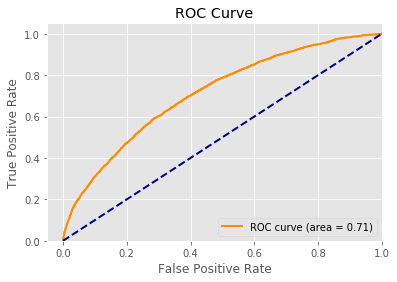

In [22]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

AUC:

In [23]:
roc_auc_score(y_test, y_scores)

0.7117372303442685

Confusion Matrix

In [24]:
y_predictions = log_reg.predict(X_test)

In [25]:
confusion_matrix(y_test, y_predictions)

array([[15626,   218],
       [ 3800,   356]])

Accuracy:

In [26]:
accuracy_score(y_test, y_predictions)

0.7991

Recall:

In [27]:
precision_recall_fscore_support(y_test, y_predictions) [0]

array([0.80438587, 0.62020906])

Precision:

In [28]:
precision_recall_fscore_support(y_test, y_predictions) [1]

array([0.98624085, 0.08565929])

__Output__:

In [32]:
y_scores_train.to_csv("../output/y_scores_train_logit.csv", sep = "^", index = False)
y_scores.to_csv("../output/y_scores_test_logit.csv", sep = "^", index = False)